# ЛР2

1. Выберите временной ряд с ценами актива (предпочтительно с явной сезонностью, например, акции компании с сезонным бизнесом).
2. Проведите декомпозицию временного ряда на тренд, сезонность и остаток. Визуализируйте компоненты декомпозиции.
3. Проанализируйте сезонность: определите периодичность и амплитуду сезонных колебаний.
4. Удалите сезонность из ряда и сравните исходный ряд с десезонализированным.
5. Постройте прогноз на основе выявленных тренда и сезонности на 12 периодов вперед.
6. Оцените качество прогноза, используя метрики MAE и RMSE.
7. Сделайте выводы о влиянии сезонности на цены актива и эффективности прогнозирования.
8. Проведите тест на стационарность ряда (тест Дики-Фуллера).
    - Если ряд нестационарен, приведите его к стационарному виду.
9. Постройте и сравните модели AR, MA, ARMA и ARIMA.
10. Подберите оптимальные параметры для каждой модели, используя информационные критерии (AIC, BIC).
11. Проведите диагностику остатков моделей.
12. Сделайте прогноз на 30 дней вперед для каждой модели.
13. Сравните качество прогнозов моделей, используя метрики MAE, RMSE и MAPE.
14. Визуализируйте результаты прогнозирования.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Загрузка данных
data = pd.read_csv('AFLT_W1.csv', parse_dates=['datetime'], index_col='datetime')
print(data.head())

            open  high   low  close  volume
datetime                                   
1999-08-08  4.00  4.00  4.00   4.00      50
1999-08-22  2.30  2.30  2.30   2.30    1325
1999-09-12  2.50  2.50  0.02   0.02       0
1999-09-19  1.30  1.40  1.30   1.40     175
1999-10-03  1.49  1.49  1.49   1.49    1200


In [2]:
AFLT_W1 = data[['close']]
print(AFLT_W1.head())

            close
datetime         
1999-08-08   4.00
1999-08-22   2.30
1999-09-12   0.02
1999-09-19   1.40
1999-10-03   1.49


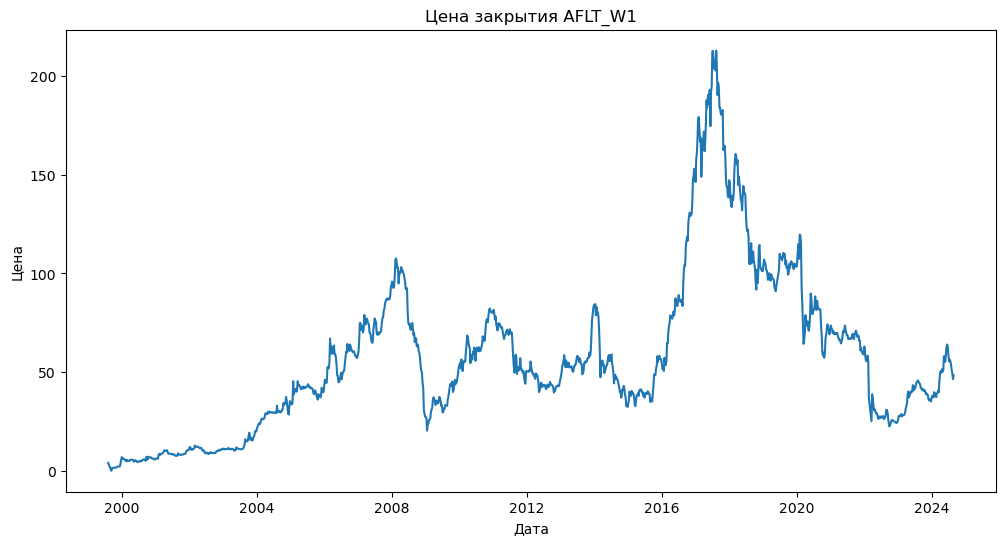

In [3]:
# 2. Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(AFLT_W1)
plt.title('Цена закрытия AFLT_W1')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

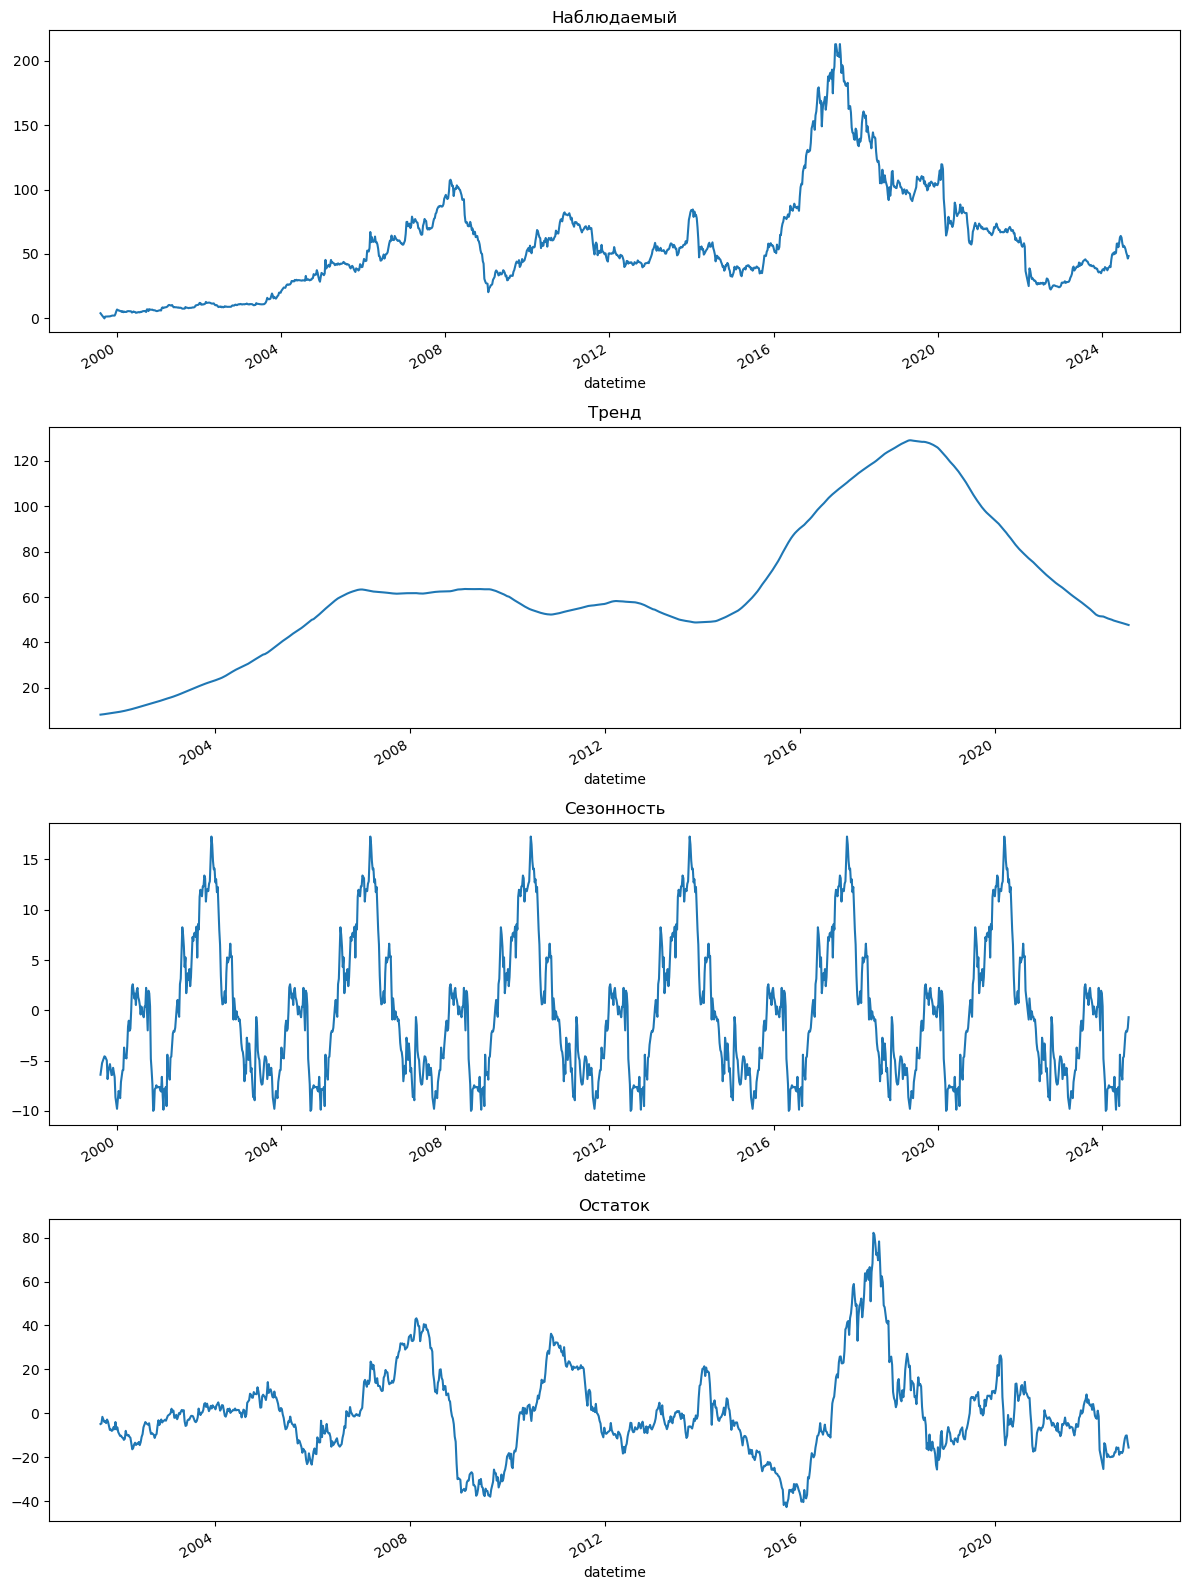

In [4]:
# 3. Декомпозиция временного ряда

decomposition = seasonal_decompose(AFLT_W1, model='additive', period=200)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Наблюдаемый')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Тренд')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Сезонность')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Остаток')
plt.tight_layout()
plt.show()

In [5]:
# Удаление сезонности
deseasonalized = AFLT_W1['close'] - decomposition.seasonal

C:\Users\Egor\AppData\Local\Temp\ipykernel_8208\4221260555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AFLT_W1['deseasonalized'] = AFLT_W1['close'] - decomposition.seasonal


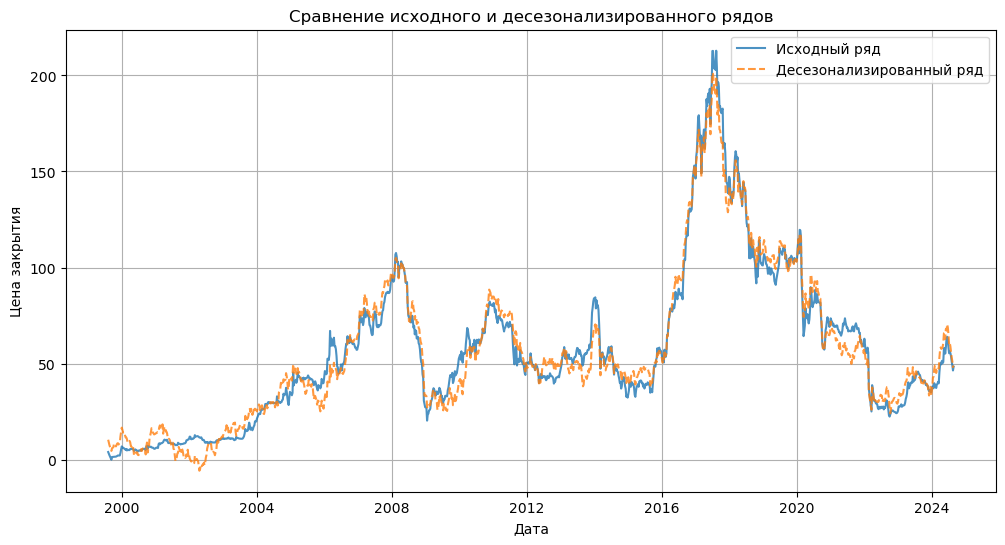

In [6]:
# Создаем десезонализированный ряд
AFLT_W1['deseasonalized'] = AFLT_W1['close'] - decomposition.seasonal

# Сравнение рядов: исходного и десезонализированного
plt.figure(figsize=(12, 6))
plt.plot(AFLT_W1['close'], label='Исходный ряд', alpha=0.8)
plt.plot(AFLT_W1['deseasonalized'], label='Десезонализированный ряд', linestyle='--', alpha=0.8)
plt.legend()
plt.title('Сравнение исходного и десезонализированного рядов')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


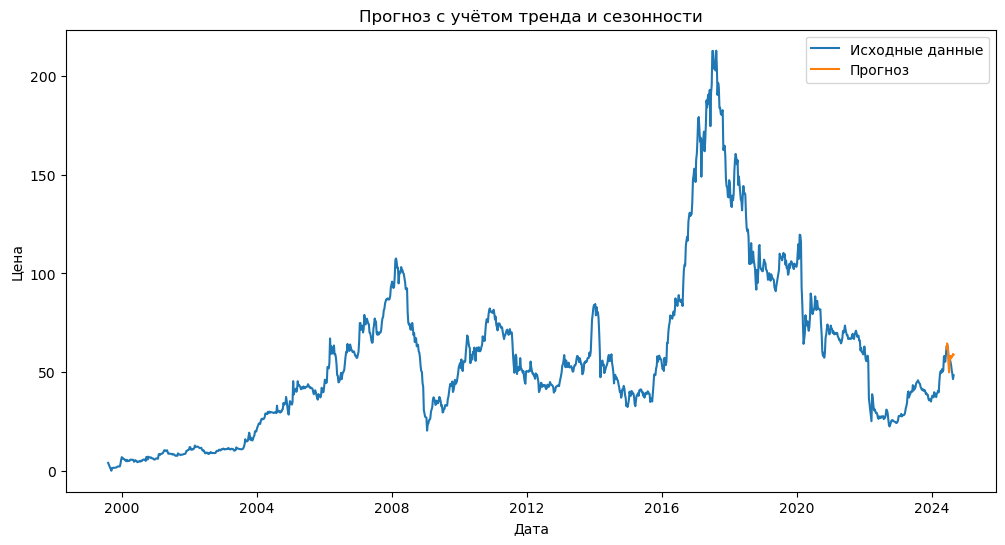

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data.iloc[-150:-12]['close'], trend='add', seasonal='add', seasonal_periods=60).fit()
forecast = model.forecast(12)
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Исходные данные')
plt.plot(data.index[-12:], forecast, label='Прогноз')
plt.title('Прогноз с учётом тренда и сезонности')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

def get_stats(data, forecast, length):
    mae = mean_absolute_error(data.iloc[-length:], forecast)
    rmse = np.sqrt(mean_squared_error(data.iloc[-length:], forecast))
    mape = mean_absolute_percentage_error(data.iloc[-length:], forecast)
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("MAPE:", mape)

get_stats(AFLT_W1['close'],forecast,12)

MAE: 4.809957640821387
RMSE: 6.22903836275782
MAPE: 0.09485421874554668


In [9]:
# 4. Тест на стационарность
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

adf_test(AFLT_W1['close'])

ADF Statistic: -2.1985979404272404
p-value: 0.20675471710367632
Critical Values:
	1%: -3.4355217427788793
	5%: -2.8638238726872296
	10%: -2.5679859566283705


In [10]:
# так как p-value > 0.05 приводим к стационарному виду
static_data = (decomposition.resid).dropna()
adf_test(static_data)

ADF Statistic: -3.576108692381838
p-value: 0.006234552274144877
Critical Values:
	1%: -3.4364934880312177
	5%: -2.8642525616723336
	10%: -2.568214266743025


In [11]:
print(static_data.head())

datetime
2001-08-26   -4.899390
2001-09-02   -4.675924
2001-09-09   -1.615532
2001-09-16   -2.776165
2001-09-23   -3.914420
Name: resid, dtype: float64


In [12]:
slise_data = AFLT_W1['close'].iloc[-190:-50] #static_data.iloc[-190:-50] #AFLT_W1['close'].iloc[-190:-50]
print(slise_data.head())

datetime
2020-12-20    69.14
2020-12-27    71.44
2021-01-03    73.58
2021-01-10    72.30
2021-01-17    71.84
Name: close, dtype: float64


In [13]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [14]:
# Поиск лучшего порядка AR
best_aic_ar, best_bic_ar, best_order_ar = float("inf"), float("inf"), None
for p in range(30):
    model = AutoReg(slise_data, lags=p).fit()
    if model.aic < best_aic_ar:
        best_aic_ar = model.aic
        best_order_ar = p
    if model.bic < best_bic_ar:
        best_bic_ar = model.bic
        best_order_ar_bic = p
        
# Поиск лучшего порядка MA
best_aic_ma, best_order_ma = float("inf"), None
for q in range(30):
    try:
        model = ARIMA(slise_data, order=(0, 0, q)).fit()
        if model.aic < best_aic_ma:
            best_aic_ma = model.aic
            best_order_ma = q
    except:
        continue
        
# Поиск лучшего порядка ARMA
best_aic_arma, best_order_arma = float("inf"), None
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(slise_data, order=(p, 0, q)).fit()
            if model.aic < best_aic_arma:
                best_aic_arma = model.aic
                best_order_arma = (p, 0, q)  # Добавляем d=0
        except:
            continue

# Поиск лучшего порядка ARIMA
best_aic_arima, best_order_arima = float("inf"), None
max_p, max_d, max_q = 5, 2, 5
for p in range(max_p + 1):
    for d in range(max_d + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(slise_data, order=(p, d, q)).fit()
                if model.aic < best_aic_arima:
                    best_aic_arima = model.aic
                    best_order_arima = (p, d, q)
            except:
                continue

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Prog

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [15]:
# Прогнозирование с использованием лучших моделей
ar_model       = AutoReg(slise_data.iloc[-150:-30], lags=best_order_ar).fit()
ar_forecast    = ar_model.forecast(30)

ma_model       = ARIMA(slise_data.iloc[-150:-30], order=(0, 0, best_order_ma)).fit()
ma_forecast    = ma_model.forecast(30)

arma_model     = ARIMA(slise_data.iloc[-150:-30], order=best_order_arma).fit()
arma_forecast  = arma_model.forecast(30)

arima_model    = ARIMA(slise_data.iloc[-150:-30], order=best_order_arima).fit()
arima_forecast = arima_model.forecast(30)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will co

In [16]:
print("Метрики качества MAE, RMSE и MAPE")
print("\nar_forecast")
get_stats(slise_data,ar_forecast,30)
print("\nma_forecast")
get_stats(slise_data,ma_forecast,30)
print("\narma_forecast")
get_stats(slise_data,arma_forecast,30)
print("\narima_forecast")
get_stats(slise_data,arima_forecast,30)

Метрики качества MAE, RMSE и MAPE

ar_forecast
MAE: 8.83297511583878
RMSE: 10.025256875113557
MAPE: 0.21276489685283068

ma_forecast
MAE: 3.702343026911325
RMSE: 4.278669113078117
MAPE: 0.10020453296466644

arma_forecast
MAE: 2.4765518599217002
RMSE: 3.507248069956745
MAPE: 0.06168491457031996

arima_forecast
MAE: 11.835822793446201
RMSE: 13.24647222082903
MAPE: 0.2865033304936384


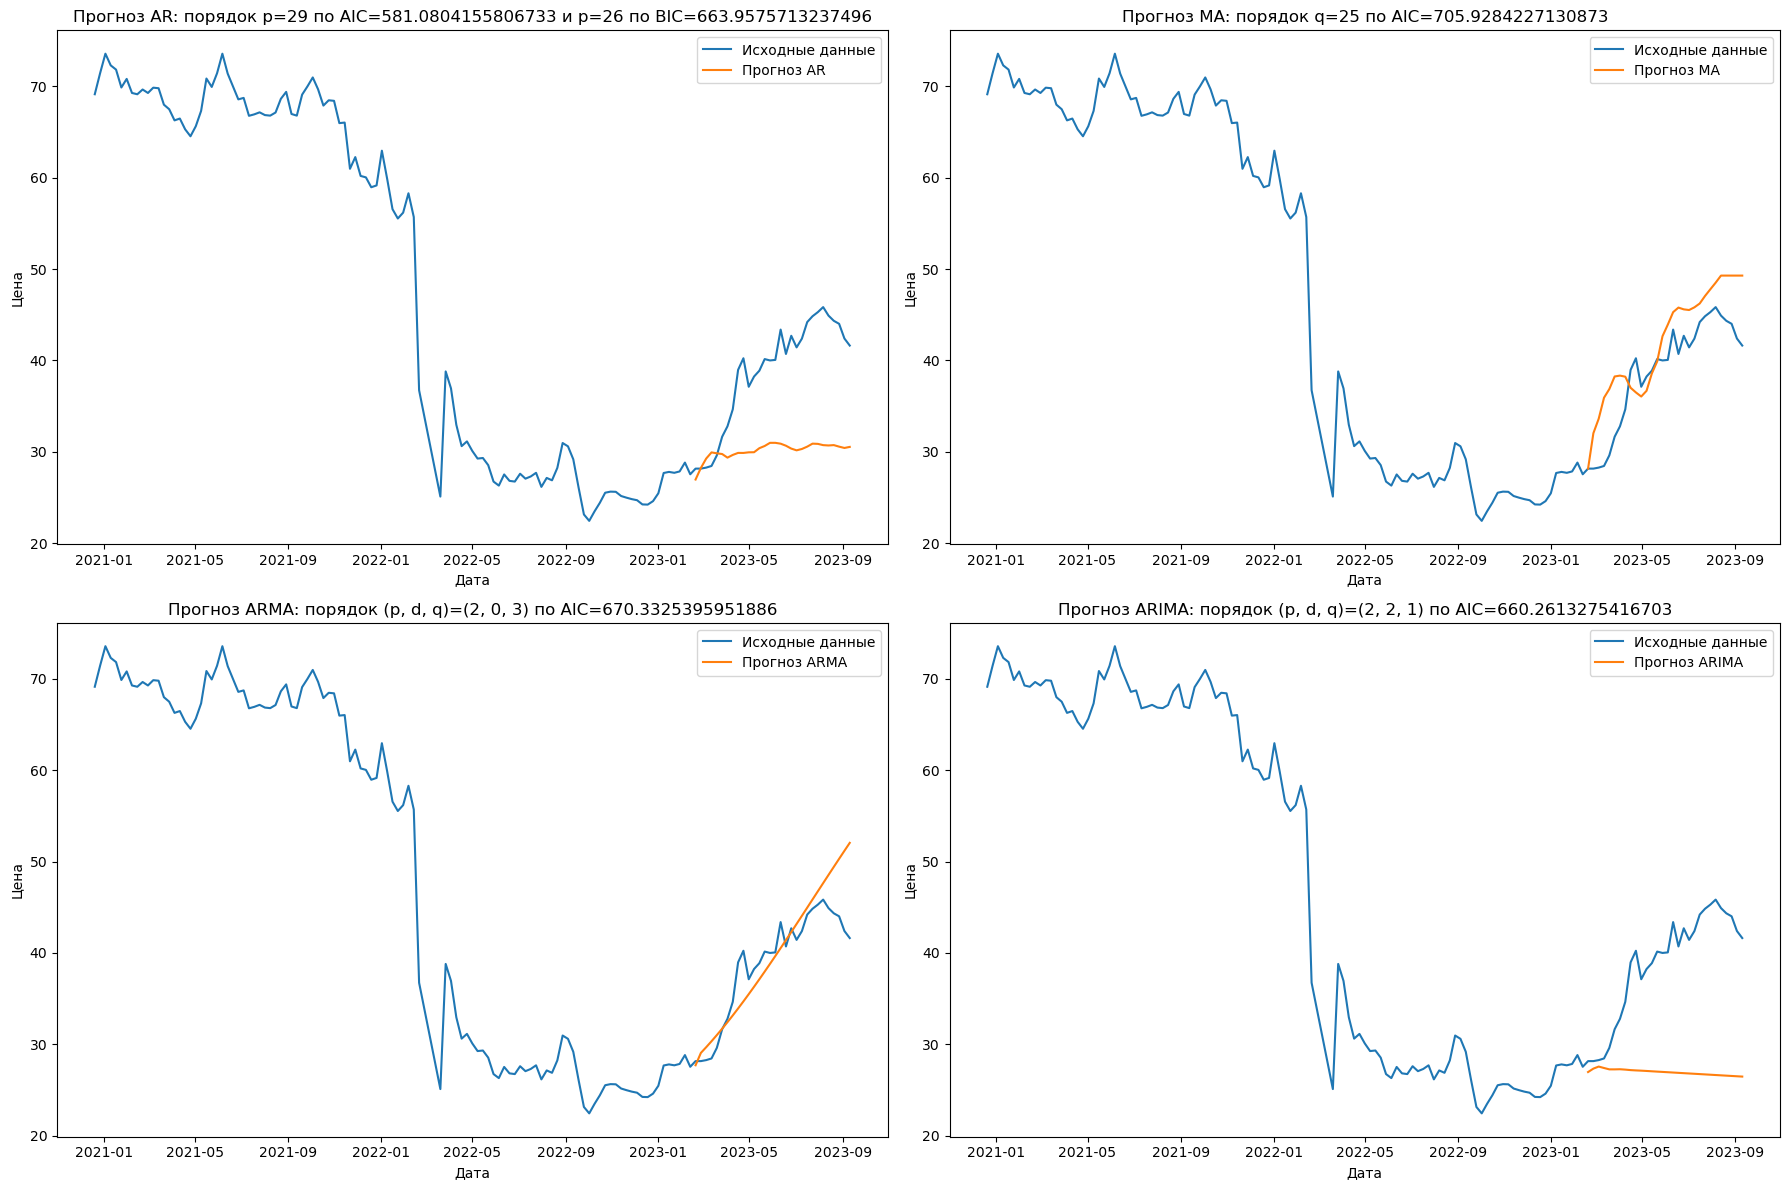

In [17]:
# Графики
plt.figure(figsize=(18, 12))

# AR
plt.subplot(2, 2, 1)
plt.plot(slise_data, label='Исходные данные')
plt.plot(slise_data.index[-30:], ar_forecast, label='Прогноз AR')
plt.title(f'Прогноз AR: порядок p={best_order_ar} по AIC={best_aic_ar} и p={best_order_ar_bic} по BIC={best_bic_ar}')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# MA
plt.subplot(2, 2, 2)
plt.plot(slise_data, label='Исходные данные')
plt.plot(slise_data.index[-30:], ma_forecast, label='Прогноз MA')
plt.title(f'Прогноз MA: порядок q={best_order_ma} по AIC={best_aic_ma}')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# ARMA
plt.subplot(2, 2, 3)
plt.plot(slise_data, label='Исходные данные')
plt.plot(slise_data.index[-30:], arma_forecast, label='Прогноз ARMA')
plt.title(f'Прогноз ARMA: порядок (p, d, q)={best_order_arma} по AIC={best_aic_arma}')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# ARIMA
plt.subplot(2, 2, 4)
plt.plot(slise_data, label='Исходные данные')
plt.plot(slise_data.index[-30:], arima_forecast, label='Прогноз ARIMA')
plt.title(f'Прогноз ARIMA: порядок (p, d, q)={best_order_arima} по AIC={best_aic_arima}')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.tight_layout()
plt.show()